# Importações Necessárias

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Lendo os dados

In [29]:
kfold = KFold(n_splits=4, shuffle=True, random_state=0) # separando o k-fold para fazer o cross-validation

df_meis = pd.read_excel("../../Data Cleaning AED/Base_ia_basica.xlsx")

display(df_meis.head(5))

,Situação Cadastral,UF,Porte Empresa,Capital Social,municipios,cnaes,Natureza Juridica,ano inicio_ativ,mes inicio_ativ,dia inicio_ativ
0,NULA,PE,Outros,5.0,RECIFE,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
1,NULA,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
2,NULA,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
3,NULA,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
4,NULA,RJ,Outros,5.0,ITAGUAI,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1


# Sepando os dados entre Atributos e Respostas

In [30]:
df_resposta = df_meis['Situação Cadastral']
df_atributos = df_meis.drop('Situação Cadastral', axis=1)

print('X:')
display(df_atributos.head(2))
print('y:')
display(df_resposta.head(2))

X:


,UF,Porte Empresa,Capital Social,municipios,cnaes,Natureza Juridica,ano inicio_ativ,mes inicio_ativ,dia inicio_ativ
0,PE,Outros,5.0,RECIFE,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
1,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1


y:


0    NULA
1    NULA
Name: Situação Cadastral, dtype: object

# Métricas com o uso do Report (Entropia, Gini e Bayes) teste

# Conversão de Variáveis Categóricas em Númericas com LabelEncoder

In [31]:
df_atributos.head(5)

,UF,Porte Empresa,Capital Social,municipios,cnaes,Natureza Juridica,ano inicio_ativ,mes inicio_ativ,dia inicio_ativ
0,PE,Outros,5.0,RECIFE,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
1,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
2,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
3,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
4,RJ,Outros,5.0,ITAGUAI,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1


In [32]:
# label_encoder = LabelEncoder()

# for col in df_atributos.columns:
#     if df_atributos[col].dtype == 'object':
#         df_atributos[col] = label_encoder.fit_transform(df_atributos[col])

preprocessador = ColumnTransformer(transformers=[('categoricas', OrdinalEncoder(), make_column_selector(dtype_include=['object'])),],remainder='passthrough',
verbose_feature_names_out= False)

X_pre = preprocessador.fit_transform(df_atributos)

display(pd.DataFrame(X_pre, columns= df_atributos.columns))

# Transforma só as colunas que são objetos


# Jeito macaco de fazer

# le_compra = LabelEncoder()
# df_atributos['compra'] = le_compra.fit_transform(df_atributos['compra'])
# le_manu = LabelEncoder()
# df_atributos['manutencao'] = le_manu.fit_transform(df_atributos['manutencao'])
# le_por = LabelEncoder()
# df_atributos['portas'] = le_por.fit_transform(df_atributos['portas'])
# le_pes = LabelEncoder()
# df_atributos['pessoas'] = le_pes.fit_transform(df_atributos['pessoas'])
# le_portas = LabelEncoder()
# df_atributos['porta-malas'] = le_portas.fit_transform(df_atributos['porta-malas'])
# le_seg = LabelEncoder()
# df_atributos['seguranca'] = le_seg.fit_transform(df_atributos['seguranca'])




# # df_resposta = label_encoder.fit_transform(df_resposta)

# display(df_atributos)
# display(df_resposta)

,UF,Porte Empresa,Capital Social,municipios,cnaes,Natureza Juridica,ano inicio_ativ,mes inicio_ativ,dia inicio_ativ
0,14.0,3.0,757.0,236.0,19.0,5.0,1970.0,1.0,1.0
1,4.0,3.0,337.0,236.0,19.0,5.0,1970.0,1.0,1.0
2,4.0,3.0,337.0,236.0,19.0,5.0,1970.0,1.0,1.0
3,4.0,3.0,337.0,236.0,19.0,5.0,1970.0,1.0,1.0
4,17.0,3.0,427.0,236.0,19.0,5.0,1970.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
13430,17.0,2.0,784.0,528.0,24.0,1.0,1970.0,1.0,1.0
13431,5.0,2.0,133.0,636.0,24.0,5.0,1970.0,1.0,1.0
13432,17.0,2.0,784.0,21.0,22.0,5.0,1970.0,1.0,1.0
13433,17.0,2.0,784.0,601.0,15.0,5.0,1970.0,1.0,1.0


# Separação dos dados entre treino e teste

In [33]:
# Separar os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_pre, df_resposta, test_size=0.25, random_state=0)

# Exibir os tamanhos dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", len(x_train))
print("Tamanho do conjunto de teste:", len(x_test))

print("Conjunto: ", x_test)

Tamanho do conjunto de treino: 10076
Tamanho do conjunto de teste: 3359
Conjunto:  [[6.000e+00 2.000e+00 9.110e+02 ... 1.970e+03 1.000e+00 1.000e+00]
 [1.700e+01 2.000e+00 1.007e+03 ... 1.970e+03 1.000e+00 1.000e+00]
 [1.700e+01 3.000e+00 7.840e+02 ... 1.970e+03 1.000e+00 1.000e+00]
 ...
 [2.300e+01 2.000e+00 2.780e+02 ... 1.970e+03 1.000e+00 1.000e+00]
 [5.000e+00 2.000e+00 1.330e+02 ... 1.970e+03 1.000e+00 1.000e+00]
 [5.000e+00 2.000e+00 1.330e+02 ... 1.970e+03 1.000e+00 1.000e+00]]


# Criando e Treinando o Classificador

In [34]:
# classificador_gini = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3)

# classificador_entropy = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)

# classificador_gini = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3)

# classificador_entropy = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)

# classificador_entropy = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)

# classificador_gini = tree.DecisionTreeClassifier(criterion='gini', splitter='best')

classificador_gini = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, min_samples_split= 25, min_samples_leaf=25)

classificador_entropy = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8, min_samples_split= 25, min_samples_leaf=25)

classificador_bayes = GaussianNB()

classificador_knn = KNeighborsClassifier()

In [35]:
x_train

array([[3.00e+00, 2.00e+00, 4.97e+02, ..., 1.97e+03, 1.00e+00, 1.00e+00],
       [1.70e+01, 2.00e+00, 8.67e+02, ..., 1.97e+03, 1.00e+00, 1.00e+00],
       [6.00e+00, 2.00e+00, 9.11e+02, ..., 1.97e+03, 1.00e+00, 1.00e+00],
       ...,
       [3.00e+00, 2.00e+00, 2.23e+02, ..., 1.97e+03, 1.00e+00, 1.00e+00],
       [3.00e+00, 2.00e+00, 8.04e+02, ..., 1.97e+03, 1.00e+00, 1.00e+00],
       [3.00e+00, 2.00e+00, 3.94e+02, ..., 1.97e+03, 1.00e+00, 1.00e+00]])

# Melhores parâmetros

# Testando os classificadores

In [36]:
classificador_gini.fit(x_train, y_train)
classificador_entropy.fit(x_train, y_train)
classificador_bayes.fit(x_train, y_train)
classificador_knn.fit(x_train, y_train)

# print("Arvore Gini")
# # Mostrando as arvores
# plt.figure(figsize=(30,7))
# tree.plot_tree(classificador_gini,
# feature_names=df_atributos.columns,
# class_names=classificador_gini.classes_,
# filled=True)

# print("Arvore Entropia")
# # mostrando as arvores
# plt.figure(figsize=(30,7))
# tree.plot_tree(classificador_entropy, feature_names=df_atributos.columns,
# class_names=classificador_entropy.classes_,
# filled=True)

KNeighborsClassifier()

# Mostrando a Árvore Feia

In [37]:
# print("Arvore Gini")
# # Mostrando as arvores
# plt.figure(figsize=(30,7))
# tree.plot_tree(classificador_gini,
# feature_names=df_atributos.columns,
# class_names=classificador_gini.classes_,
# filled=True)

# print("Arvore Entropia")
# # mostrando as arvores
# plt.figure(figsize=(30,7))
# tree.plot_tree(classificador_entropy, feature_names=df_atributos.columns,
# class_names=classificador_entropy.classes_,
# filled=True)

# Mostrando a Árvore que leva a decisão

In [38]:
# import graphviz
# import os

# os.environ["PATH"] += os.pathsep + 'C:\\Users\\davicavalcante-ieg\\Graphviz-11.0.0-win64\\bin'

# # Criando a Árvore
# arvore_gini = tree.export_graphviz(classificador_gini,
# feature_names=df_atributos.columns,
# class_names=classificador_gini.classes_,
# filled=True)


# graph = graphviz.Source(arvore_gini, format="png")
# display(graph)

# arvore_entropia = tree.export_graphviz(classificador_entropy,
# feature_names=df_atributos.columns,
# class_names=classificador_gini.classes_,
# filled=True)

# graph2 = graphviz.Source(arvore_entropia, format="png")
# display(graph2)

# # ele sempre faz binario, a classe pessoas foi transformada em 0, 1 e 2,

# Testando

In [39]:
classificacao_gini_test = classificador_gini.predict(x_test)
classificacao_entropy_test = classificador_entropy.predict(x_test)
classificacao_bayes_test = classificador_bayes.predict(x_test)
classificacao_knn_test = classificador_knn.predict(x_test)


classificacao_gini_train = classificador_gini.predict(x_train)
classificacao_entropy_train = classificador_entropy.predict(x_train)
classificacao_bayes_train = classificador_bayes.predict(x_train)
classificacao_knn_train = classificador_knn.predict(x_train)

# Classificação

In [40]:
# Gini
print("Gini")
relatorio = classification_report(y_test, classificacao_gini_test, target_names=df_meis['Situação Cadastral'].unique())
print(relatorio, '\n')

Gini
              precision    recall  f1-score   support

        NULA       0.87      0.89      0.88      2502
       ATIVA       0.00      0.00      0.00        28
      INAPTA       0.47      0.46      0.47       434
     BAIXADA       0.58      0.54      0.56       394
    SUSPENSA       0.00      0.00      0.00         1

    accuracy                           0.79      3359
   macro avg       0.38      0.38      0.38      3359
weighted avg       0.78      0.79      0.78      3359
 



c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [41]:
# Entropia
print("Entropia")
relatorio = classification_report(y_test, classificacao_entropy_test, target_names=df_meis['Situação Cadastral'].unique())
print(relatorio, '\n')

Entropia


c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        NULA       0.85      0.91      0.88      2502
       ATIVA       0.00      0.00      0.00        28
      INAPTA       0.49      0.36      0.41       434
     BAIXADA       0.57      0.53      0.55       394
    SUSPENSA       0.00      0.00      0.00         1

    accuracy                           0.79      3359
   macro avg       0.38      0.36      0.37      3359
weighted avg       0.77      0.79      0.77      3359
 



c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# Bayes
print("Bayes")
relatorio = classification_report(y_test, classificacao_bayes_test, target_names=df_meis['Situação Cadastral'].unique())
print(relatorio)

c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bayes
              precision    recall  f1-score   support

        NULA       1.00      0.00      0.00      2502
       ATIVA       0.00      0.00      0.00        28
      INAPTA       0.13      0.99      0.23       434
     BAIXADA       0.66      0.05      0.09       394
    SUSPENSA       0.00      0.00      0.00         1

    accuracy                           0.13      3359
   macro avg       0.36      0.21      0.06      3359
weighted avg       0.84      0.13      0.04      3359



c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# Gini
print("KNN")
relatorio = classification_report(y_test, classificacao_knn_test, target_names=df_meis['Situação Cadastral'].unique())
print(relatorio, '\n')

KNN


c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        NULA       0.78      0.93      0.85      2502
       ATIVA       0.00      0.00      0.00        28
      INAPTA       0.27      0.11      0.16       434
     BAIXADA       0.48      0.22      0.30       394
    SUSPENSA       0.00      0.00      0.00         1

    accuracy                           0.73      3359
   macro avg       0.31      0.25      0.26      3359
weighted avg       0.67      0.73      0.69      3359
 



c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Métricas com o uso do Report (Entropia, Gini e Bayes) treino

In [44]:
# Gini
print("Gini")
relatorio = classification_report(y_train, classificacao_gini_train, target_names=df_meis['Situação Cadastral'].unique())
print(relatorio, '\n')

Gini


c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        NULA       0.86      0.90      0.88      7284
       ATIVA       0.00      0.00      0.00        70
      INAPTA       0.50      0.48      0.49      1428
     BAIXADA       0.65      0.56      0.60      1288
    SUSPENSA       0.00      0.00      0.00         6

    accuracy                           0.79     10076
   macro avg       0.40      0.39      0.39     10076
weighted avg       0.78      0.79      0.78     10076
 



c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Entropia
print("Entropia")
relatorio = classification_report(y_train, classificacao_entropy_train, target_names=df_meis['Situação Cadastral'].unique())
print(relatorio, '\n')

Entropia


c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

              precision    recall  f1-score   support

        NULA       0.85      0.91      0.88      7284
       ATIVA       0.00      0.00      0.00        70
      INAPTA       0.51      0.38      0.44      1428
     BAIXADA       0.66      0.57      0.61      1288
    SUSPENSA       0.00      0.00      0.00         6

    accuracy                           0.79     10076
   macro avg       0.40      0.37      0.39     10076
weighted avg       0.77      0.79      0.77     10076
 



In [46]:
# Bayes
print("Bayes")
relatorio = classification_report(y_train, classificacao_bayes_train, target_names=df_meis['Situação Cadastral'].unique())
print(relatorio)

Bayes


c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        NULA       0.45      0.00      0.00      7284
       ATIVA       0.00      0.00      0.00        70
      INAPTA       0.14      1.00      0.25      1428
     BAIXADA       0.55      0.04      0.08      1288
    SUSPENSA       0.00      0.00      0.00         6

    accuracy                           0.15     10076
   macro avg       0.23      0.21      0.07     10076
weighted avg       0.42      0.15      0.05     10076



c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Bayes
print("KNN")
relatorio = classification_report(y_train, classificacao_knn_train, target_names=df_meis['Situação Cadastral'].unique())
print(relatorio)

KNN


c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        NULA       0.79      0.97      0.87      7284
       ATIVA       0.50      0.01      0.03        70
      INAPTA       0.60      0.26      0.36      1428
     BAIXADA       0.74      0.34      0.47      1288
    SUSPENSA       0.00      0.00      0.00         6

    accuracy                           0.78     10076
   macro avg       0.53      0.32      0.35     10076
weighted avg       0.76      0.78      0.74     10076



c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Plot matriz de confusão

[[ 208  152   34    0    0]
 [  99 2282  121    0    0]
 [  51  227  156    0    0]
 [   4   16    8    0    0]
 [   0    1    0    0    0]]


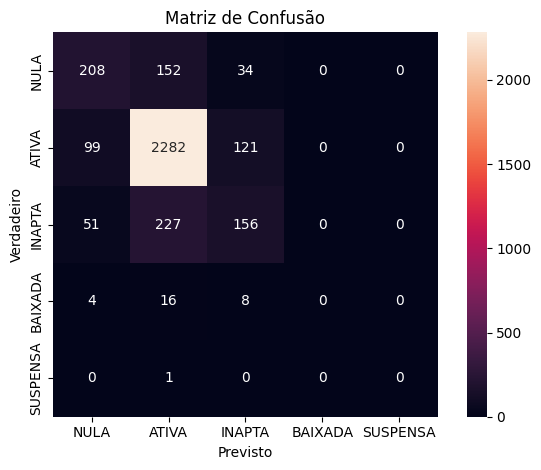

In [48]:
# Calcula a matriz de confusão
matriz_de_confusao = confusion_matrix(y_test, classificacao_entropy_test, labels=['NULA', 'ATIVA', 'INAPTA', 'BAIXADA', 'SUSPENSA'])
print(matriz_de_confusao)

# Visualiza a matriz de confusão
sns.heatmap(matriz_de_confusao, square=True, annot=True, fmt='d', cbar=True, 
            yticklabels=['NULA', 'ATIVA', 'INAPTA', 'BAIXADA', 'SUSPENSA'], 
            xticklabels=['NULA', 'ATIVA', 'INAPTA', 'BAIXADA', 'SUSPENSA'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.tight_layout()
plt.show()

# Cross validation

## Validação sem normalização

In [49]:
# Validar sem normalização
print("Validação cruzada sem normalização:")
scores = cross_val_score(classificador_bayes, X_pre, df_resposta, cv=kfold)
print("Scores:", scores)
print("Média:", scores.mean())

Validação cruzada sem normalização:
Scores: [0.13486157 0.14766299 0.14944924 0.14264443]
Média: 0.14365455823393936


# Validação com normalização

In [50]:
# atributos_norm = df_atributos.values
# for indice_treino, indice_teste  in kfold.split(atributos_norm) :
#     classificador_bayes.fit(atributos_norm[indice_treino], df_resposta[indice_treino])
#     classificacao_cross = classificador_bayes.predict(atributos_norm[indice_teste])
#     matriz_confusao_cross = confusion_matrix(df_resposta[indice_teste], classificacao_cross)
#     print("\nClassificação: ", classificacao_cross)
#     print(matriz_confusao_cross)

## Metricas Cross Validation

In [51]:
# print("Bayes")
# relatorio = classification_report(y_test, classificacao_cross, target_names=df_carro["avaliacao"].unique())
# print(relatorio)

## Balanceamento de Classes com Smote

In [52]:
# smote = SMOTE(random_state=0)
# x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [53]:
# classificador_bayes_smote = GaussianNB()
# classificador_bayes_smote.fit(x_train_res, y_train_res)

In [54]:
# classificacao_bayes_smote = classificador_bayes.predict(x_test)